In [1]:
# 공통 코드
# 파이썬 >= 3.5 필수
import sys
assert sys.version_info >= (3,5)

# 사이킷런 >= 0.20 필수
import sklearn
assert sklearn.__version__ >="0.20"

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import seaborn as sns
import os

# 시드 설정
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 음수 출력
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 설정
import platform
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
	rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

# 그림 저장 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "DeepLearning_Keras_CNN" ##
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 경고 없애기
import warnings
warnings.filterwarnings(action='ignore')

# 텐서플로와 케라스
import tensorflow as tf
from tensorflow import keras

# json 파싱
import json
# 텐서플로우 데이터셋
import tensorflow_datasets as tfds

In [4]:
# 데이터 경로 생성
train_key_source_dir = 'datasets/cow/가축 행동 영상/Training/[원천]소_keypoints'
valid_key_source_dir = 'datasets/cow/가축 행동 영상/Validation/[원천]소_keypoints'

train_key_label_dir = 'datasets/cow/가축 행동 영상/Training/[라벨]소_keypoints'
valid_key_label_dir = 'datasets/cow/가축 행동 영상/Validation/[라벨]소_keypoints'

In [6]:
import os
# 파일이름 리스트 만들기
train_key_source_list = os.listdir(train_key_source_dir)
train_key_label_list = os.listdir(train_key_label_dir)

In [29]:
# keypoint 데이터 개수
num_keypoint = len(train_key_source_list)

# 경로 + 파일이름을 리스트에 저장하기
## 키포인트 원천 - 이미지 파일
train_key_source_path=[]
for idx in range(num_keypoint):
    a = train_key_source_dir + '/' + train_key_source_list[idx]
    train_key_source_path.append(a)

## 키포인트 라벨 - json 파일
train_key_label_path=[]
for idx in range(num_keypoint):
    a = train_key_label_dir + '/' + train_key_label_list[idx]
    train_key_label_path.append(a)

## 이미지 출력
* Training - Source - Keypoint
* jpg 파일

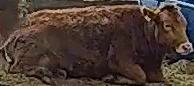

In [30]:
# 이미지 출력 1
from PIL import Image
image = Image.open(train_key_source_path[0])
image

<class 'numpy.ndarray'>
(86, 194, 3)


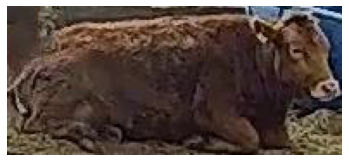

In [31]:
# 이미지 출력 2
import matplotlib.image as img
import matplotlib.pyplot as plt

ndarray=img.imread(train_key_source_path[0])
plt.imshow(ndarray)
plt.axis('off')

print(type(ndarray))
print(ndarray.shape)

## 키포인트 라벨 출력
* json
* 키포인트 각 좌표 꺼내서 이미지 위에 그려보자

In [ ]:
# json 파일이 어떻게 되어 있나 보자...
{"label_info": 
 {"image": 
  {"file_name": 
   "livestock_cow_keypoints_000001.jpg", 
   "width": 194, 
   "height": 86, 
   "farm_name": 
   "yangpyeong", 
   "farm_env": "open", 
   "time": "daytime"}, 
  "annotations": [
      {"bbox": [0, 0, 194, 86], 
       "keypoints": [168, 9, 2, 147, 11, 2, 115, 10, 2, 120, 60, 2, 141, 77, 2, 112, 78, 2, 143, 55, 1, 158, 76, 1, 134, 75, 1, 47, 11, 2, 35, 51, 2, 18, 66, 2, 48, 74, 2, 55, 45, 1, 39, 58, 1, 62, 72, 2, 17, 28, 1], "category_id": 2}], 
  "categories": [{"supercategory": 
                  "livestock_cow", 
                  "id": 1, 
                  "name": "cattle", 
                  "keypoints_name": ["fore_head", "neck", "fore_spine", "fore_right_shoulder", "fore_right_knee", "fore_right_foot", "fore_left_shoulder", "fore_left_knee", "fore_left_foot", "rear_spine", "rear_right_shoulder", "rear_right_knee", "rear_right_foot", "rear_left_shoulder", "rear_left_knee", "rear_left_foot", "hip"], 
                  "skeleton": [[1, 2], [2, 3], [3, 4], [3, 7], [3, 10], [4, 5], [5, 6], [7, 8], [8, 9], [10, 11], [10, 14], [11, 12], [12, 13], [14, 15], [15, 16], [10, 17]]}, 
                  {"supercategory": "livestock_cow", "id": 2, "name": "nuptial", "keypoints_name": ["fore_head", "neck", "fore_spine", "fore_right_shoulder", "fore_right_knee", "fore_right_foot", "fore_left_shoulder", "fore_left_knee", "fore_left_foot", "rear_spine", "rear_right_shoulder", "rear_right_knee", "rear_right_foot", "rear_left_shoulder", "rear_left_knee", "rear_left_foot", "hip"], "skeleton": [[1, 2], [2, 3], [3, 4], [3, 7], [3, 10], [4, 5], [5, 6], [7, 8], [8, 9], [10, 11], [10, 14], [11, 12], [12, 13], [14, 15], [15, 16], [10, 17]]}, 
                  {"supercategory": "livestock_cow", "id": 3, "name": "calf", 
  "keypoints_name": ["fore_head", "neck", "fore_spine", "fore_right_shoulder", "fore_right_knee", "fore_right_foot", "fore_left_shoulder", "fore_left_knee", "fore_left_foot", "rear_spine", "rear_right_shoulder", "rear_right_knee", "rear_right_foot", "rear_left_shoulder", "rear_left_knee", "rear_left_foot", "hip"], 
  "skeleton": [[1, 2], [2, 3], [3, 4], [3, 7], [3, 10], [4, 5], [5, 6], [7, 8], [8, 9], [10, 11], [10, 14], [11, 12], [12, 13], [14, 15], [15, 16], [10, 17]]
       }
       ]
 }
}

In [61]:
key_label_df = pd.read_json(train_key_label_path[0])
key_label_df.index

Index(['annotations', 'categories', 'image'], dtype='object')

In [62]:
# 'annotations', 'categories', 'image'
key_label_df_T = key_label_df.transpose()
train_annotations = key_label_df_T['annotations'] # Series

In [68]:
# index
key_label_df.label_info.index

Index(['annotations', 'categories', 'image'], dtype='object')

In [69]:
key_label_df.label_info.annotations

[{'bbox': [0, 0, 194, 86],
  'keypoints': [168,
   9,
   2,
   147,
   11,
   2,
   115,
   10,
   2,
   120,
   60,
   2,
   141,
   77,
   2,
   112,
   78,
   2,
   143,
   55,
   1,
   158,
   76,
   1,
   134,
   75,
   1,
   47,
   11,
   2,
   35,
   51,
   2,
   18,
   66,
   2,
   48,
   74,
   2,
   55,
   45,
   1,
   39,
   58,
   1,
   62,
   72,
   2,
   17,
   28,
   1],
  'category_id': 2}]

In [70]:
key_label_df.label_info.categories

[{'supercategory': 'livestock_cow',
  'id': 1,
  'name': 'cattle',
  'keypoints_name': ['fore_head',
   'neck',
   'fore_spine',
   'fore_right_shoulder',
   'fore_right_knee',
   'fore_right_foot',
   'fore_left_shoulder',
   'fore_left_knee',
   'fore_left_foot',
   'rear_spine',
   'rear_right_shoulder',
   'rear_right_knee',
   'rear_right_foot',
   'rear_left_shoulder',
   'rear_left_knee',
   'rear_left_foot',
   'hip'],
  'skeleton': [[1, 2],
   [2, 3],
   [3, 4],
   [3, 7],
   [3, 10],
   [4, 5],
   [5, 6],
   [7, 8],
   [8, 9],
   [10, 11],
   [10, 14],
   [11, 12],
   [12, 13],
   [14, 15],
   [15, 16],
   [10, 17]]},
 {'supercategory': 'livestock_cow',
  'id': 2,
  'name': 'nuptial',
  'keypoints_name': ['fore_head',
   'neck',
   'fore_spine',
   'fore_right_shoulder',
   'fore_right_knee',
   'fore_right_foot',
   'fore_left_shoulder',
   'fore_left_knee',
   'fore_left_foot',
   'rear_spine',
   'rear_right_shoulder',
   'rear_right_knee',
   'rear_right_foot',
   'rear_l

In [76]:
key_label_df.label_info.image
# type(key_label_df.label_info.image) # dict. key-value를 꺼내써보자

{'file_name': 'livestock_cow_keypoints_000001.jpg',
 'width': 194,
 'height': 86,
 'farm_name': 'yangpyeong',
 'farm_env': 'open',
 'time': 'daytime'}

In [77]:
# file_name의 값에 해당하는 이미지에 keypoints 그려보자
file_name = key_label_df.label_info.image['file_name']

'livestock_cow_keypoints_000001.jpg'

In [90]:
# keypoints를 꺼내보자
[annotations] = key_label_df.label_info.annotations
annotations # dict
annotations['keypoints']
# len(annotations['keypoints'])   # 51

[168,
 9,
 2,
 147,
 11,
 2,
 115,
 10,
 2,
 120,
 60,
 2,
 141,
 77,
 2,
 112,
 78,
 2,
 143,
 55,
 1,
 158,
 76,
 1,
 134,
 75,
 1,
 47,
 11,
 2,
 35,
 51,
 2,
 18,
 66,
 2,
 48,
 74,
 2,
 55,
 45,
 1,
 39,
 58,
 1,
 62,
 72,
 2,
 17,
 28,
 1]

In [101]:
# 각 키포인트를 따로 저장하자
# x좌표, y좌표, vis 여부
keypoints_list = annotations['keypoints']
keypoints_num = len(keypoints_list)

cow_key_x = []
cow_key_y = []
cow_key_vis = []
for idx in range(keypoints_num):
    if idx % 3 == 0:
            cow_key_x.append(keypoints_list[idx])
    elif idx % 3 == 1:
            cow_key_y.append(keypoints_list[idx])
    else :
            cow_key_vis.append(keypoints_list[idx])

In [102]:
# 이제 x, y 좌표로 소 사진 위에 키포인트 찍어보자
cow_key_x[i], cow_key_y[i]

[168, 147, 115, 120, 141, 112, 143, 158, 134, 47, 35, 18, 48, 55, 39, 62, 17]